In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
import string
import json
import glob

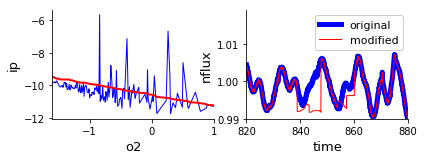

In [47]:
# for fname in files:
fname = "logs/2017_09_07_09.log"
i = 0
# f, axs = plt.subplots(2)
# ax = axs[0]
ax = plt.subplot(221)
 
with open(fname) as f:
    for line in f.readlines():
        line = line.split(",")
        timestamp = line[0]
        ip = line[1]
        function = line[2]
        if function =="sketched query":
            xycoord = json.loads(','.join(line[3:]))
            x = [xy["xval"] for xy in xycoord]
            y = [xy["yval"] for xy in xycoord]
            if i==9:
                ax.plot(x,y,'-',lw=1,color="blue",label="original")
            if i==10:                
                ax.plot(x,y,'-',lw=2,color="red",label="modified")
            i+=1
ax.set_xlabel("o2",fontsize=13)
ax.set_ylabel("ip",fontsize=13)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlim(-1.6,1)          
# plt.legend(loc='best', fancybox=True, framealpha=1)
########################
df = pd.read_csv("/Users/dorislee/Desktop/Research/zenvisage/datavis_kplr/kepler_sample40.csv")
selected_df = df[df["objid_cycle"]=="4644952:Q9"]
# ax2 = axs[1]
ax2 = plt.subplot(222)
ax2.plot(selected_df["time"],selected_df["nflux"],lw=5,color="blue",label="original")
i = 0
with open("logs/2017_09_19_09.log") as f:
    for line in f.readlines():
        line = line.split(",")
        timestamp = line[0]
        ip = line[1]
        function = line[2]
        if function =="sketched query":
            xycoord = json.loads(','.join(line[3:]))
            x = [xy["xval"] for xy in xycoord]
            y = [xy["yval"] for xy in xycoord]
            #plt.title(timestamp)
            if i==10:
                ax2.plot(x,y,'-',lw=1,color="red",label="modified")
            i+=1
plt.legend(loc='upper right', fancybox=True, framealpha=1,fontsize=11)
ax2.set_xlim(820,880)         
ax2.set_ylim(0.99,1.019)         
ax2.set_xlabel("time",fontsize=13)
ax2.set_ylabel("nflux",fontsize=13)
ax2.yaxis.set_ticks_position('left')
ax2.xaxis.set_ticks_position('bottom')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
plt.tight_layout()
plt.savefig("QueryModificationBySketch.pdf")
plt.subplots_adjust(wspace=0.2)